In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [28]:
import io
import requests
data=pd.read_csv("data.csv") 
data.head(100)

sex          age  suicides_no  population  suicides/100k pop  \
0     male  15-24 years           21      312900               6.71   
1     male  35-54 years           16      308000               5.19   
2   female  15-24 years           14      289700               4.83   
3     male    75+ years            1       21800               4.59   
4     male  25-34 years            9      274300               3.28   
5   female    75+ years            1       35600               2.81   
6   female  35-54 years            6      278800               2.15   
7   female  25-34 years            4      257200               1.56   
8     male  55-74 years            1      137500               0.73   
9   female   5-14 years            0      311000               0.00   
10  female  55-74 years            0      144600               0.00   
11    male   5-14 years            0      338200               0.00   
12  female    75+ years            2       36400               5.49   
13    male  15-24 years           17      319200               5.33   
14    male    75+ years            1       22300               4.48   
15    male  35-54 years           14      314100               4.46   
16    male  55-74 years            4      140200               2.85   
17  female  15-24 years            8      295600               2.71   
18  female  55-74 years            3      147500               2.03   
19  female  25-34 years            5      262400               1.91   
20    male  25-34 years            5      279900               1.79   
21  female  35-54 years            4      284500               1.41   
22  female   5-14 years            0      317200               0.00   
23    male   5-14 years            0      345000               0.00   
24    male    75+ years            2       22500               8.89   
25    male  25-34 years           18      283600               6.35   
26    male  35-54 years           15      318400               4.71   
27    male  55-74 years            6      142100               4.22   
28    male  15-24 years           12      323500               3.71   
29  female  35-54 years            7      288600               2.43   
..     ...          ...          ...         ...                ...   
70    male   5-14 years            1      371800               0.27   
71  female   5-14 years            0      344400               0.00   
72    male  25-34 years           13      232900               5.58   
73    male  55-74 years            9      178000               5.06   
74  female    75+ years            2       40800               4.90   
75  female  15-24 years           13      283500               4.59   
76    male  15-24 years           11      241200               4.56   
77    male    75+ years            1       25100               3.98   
78    male  35-54 years           14      375900               3.72   
79  female  25-34 years            7      264000               2.65   
80  female  35-54 years            8      356400               2.24   
81    male   5-14 years            6      376500               1.59   
82  female  55-74 years            2      180400               1.11   
83  female   5-14 years            2      348700               0.57   
84    male    75+ years            2       25400               7.87   
85    male  15-24 years           17      243600               6.98   
86    male  25-34 years           14      235300               5.95   
87  female  15-24 years           16      287700               5.56   
88  female    75+ years            2       41200               4.85   
89  female  25-34 years           10      267900               3.73   
90    male  35-54 years           12      379600               3.16   
91  female  35-54 years            9      362000               2.49   
92    male  55-74 years            3      179900               1.67   
93  female  55-74 years            1      183100               0.55   
94    male   5-14 years        

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [4]:
data.describe()

suicides_no    population  suicides/100k pop  HDI for year  \
count  27820.000000  2.782000e+04       27820.000000   8364.000000   
mean     242.574407  1.844794e+06          12.816097      0.776601   
std      902.047917  3.911779e+06          18.961511      0.093367   
min        0.000000  2.780000e+02           0.000000      0.483000   
25%        3.000000  9.749850e+04           0.920000      0.713000   
50%       25.000000  4.301500e+05           5.990000      0.779000   
75%      131.000000  1.486143e+06          16.620000      0.855000   
max    22338.000000  4.380521e+07         224.970000      0.944000   

       gdp_per_capita ($)  
count        27820.000000  
mean         16866.464414  
std          18887.576472  
min            251.000000  
25%           3447.000000  
50%           9372.000000  
75%          24874.000000  
max         126352.000000

Нехватает данных только по HDI, на первый взгляд. С одной стороны это очень важный признак (уровень удовлетворенности жизнью).  
С другой стороны его очень мало. Мы его отбросим позже.  
Сейчас поработаем с данными объектного типа.

In [29]:
data['sex'] = data['sex'].astype('category')
data['gender'] = data['sex'].cat.codes
data.drop(['sex'], axis='columns', inplace=True)
data.head(10)

age  suicides_no  population  suicides/100k pop country-year  \
0  15-24 years           21      312900               6.71  Albania1987   
1  35-54 years           16      308000               5.19  Albania1987   
2  15-24 years           14      289700               4.83  Albania1987   
3    75+ years            1       21800               4.59  Albania1987   
4  25-34 years            9      274300               3.28  Albania1987   
5    75+ years            1       35600               2.81  Albania1987   
6  35-54 years            6      278800               2.15  Albania1987   
7  25-34 years            4      257200               1.56  Albania1987   
8  55-74 years            1      137500               0.73  Albania1987   
9   5-14 years            0      311000               0.00  Albania1987   

   HDI for year  gdp_for_year ($)   gdp_per_capita ($)       generation  \
0           NaN      2,156,624,900                 796     Generation X   
1           NaN      2,156,624,900                 796           Silent   
2           NaN      2,156,624,900                 796     Generation X   
3           NaN      2,156,624,900                 796  G.I. Generation   
4           NaN      2,156,624,900                 796          Boomers   
5           NaN      2,156,624,900                 796  G.I. Generation   
6           NaN      2,156,624,900                 796           Silent   
7           NaN      2,156,624,900                 796          Boomers   
8           NaN      2,156,624,900                 796  G.I. Generation   
9           NaN      2,156,624,900                 796     Generation X   

   gender  
0       1  
1       1  
2       0  
3       1  
4       1  
5       0  
6       0  
7       0  
8       1  
9       0

In [8]:
data.groupby('age').count()

suicides_no  population  suicides/100k pop  country-year  \
age                                                                     
15-24 years         4642        4642               4642          4642   
25-34 years         4642        4642               4642          4642   
35-54 years         4642        4642               4642          4642   
5-14 years          4610        4610               4610          4610   
55-74 years         4642        4642               4642          4642   
75+ years           4642        4642               4642          4642   

             HDI for year   gdp_for_year ($)   gdp_per_capita ($)  generation  \
age                                                                             
15-24 years          1394                4642                4642        4642   
25-34 years          1394                4642                4642        4642   
35-54 years          1394                4642                4642        4642   
5-14 years           1394                4610                4610        4610   
55-74 years          1394                4642                4642        4642   
75+ years            1394                4642                4642        4642   

             gender  
age                  
15-24 years    4642  
25-34 years    4642  
35-54 years    4642  
5-14 years     4610  
55-74 years    4642  
75+ years      4642

In [30]:
data['age_avv'] = 0
ind = 0 
total = data['age'].count()
print(total)
while ind < total:
    age = data.loc[ind, 'age']
    age_min = age.lstrip().split('-')[0]
    age_min = int(age_min.split('+')[0])
    if age_min == 5 or age_min == 75:
        age_max = age_min + 9
        age_avv = age_min + 4.5
    else:
        age_max = age_min + 19
        age_avv = age_min + 9.5
    data.loc[ind, 'age_avv'] = age_avv
    ind += 1
data.head()   

27820


age  suicides_no  population  suicides/100k pop country-year  \
0  15-24 years           21      312900               6.71  Albania1987   
1  35-54 years           16      308000               5.19  Albania1987   
2  15-24 years           14      289700               4.83  Albania1987   
3    75+ years            1       21800               4.59  Albania1987   
4  25-34 years            9      274300               3.28  Albania1987   

   HDI for year  gdp_for_year ($)   gdp_per_capita ($)       generation  \
0           NaN      2,156,624,900                 796     Generation X   
1           NaN      2,156,624,900                 796           Silent   
2           NaN      2,156,624,900                 796     Generation X   
3           NaN      2,156,624,900                 796  G.I. Generation   
4           NaN      2,156,624,900                 796          Boomers   

   gender  age_avv  
0       1     24.5  
1       1     44.5  
2       0     24.5  
3       1     79.5  
4       1     34.5

В таком виде возраст можно использовать в расчетах

In [15]:
data.groupby('country-year').sum()

suicides_no  population  suicides/100k pop  \
country-year                                                          
Albania1987                       73     2709600              31.85   
Albania1988                       63     2764300              32.46   
Albania1989                       68     2803100              33.40   
Albania1992                       47     2822500              18.00   
Albania1993                       73     2807300              32.56   
Albania1994                       50     2849300              32.18   
Albania1995                       88     2903400              40.55   
Albania1996                       89     2940200              43.62   
Albania1997                      170     2977300              77.43   
Albania1998                      154     3012700              66.52   
Albania1999                      139     3029700              69.81   
Albania2000                       54     2796300              30.70   
Albania2001                      119     2799349              50.62   
Albania2002                      133     2818839              62.51   
Albania2003                      124     2843929              58.60   
Albania2004                      146     2874991              65.39   
Albania2005                        0     2783320               0.00   
Albania2006                        0     2780176               0.00   
Albania2007                      124     2770344              65.85   
Albania2008                      160     2757059              71.05   
Albania2009                        0     2745735               0.00   
Albania2010                       96     2736025              41.66   
Antigua and Barbuda1985            0       62574               0.00   
Antigua and Barbuda1986            0       61270               0.00   
Antigua and Barbuda1987            0       60261               0.00   
Antigua and Barbuda1988            0       59564               0.00   
Antigua and Barbuda1989            0       59238               0.00   
Antigua and Barbuda1990            1       59334              17.24   
Antigua and Barbuda1991            0       60394               0.00   
Antigua and Barbuda1992            0       61741               0.00   
...                              ...         ...                ...   
Uruguay2007                      576     3087957             266.31   
Uruguay2008                      523     3100791             234.53   
Uruguay2009                      511     3114306             237.75   
Uruguay2010                      547     3127306             257.43   
Uruguay2012                      599     3151939             264.35   
Uruguay2013                      546     3164670             249.09   
Uruguay2014                      591     3177645             248.64   
Uruguay2015                      630     3190795             270.02   
Uzbekistan1990                  1459    17165700             129.36   
Uzbekistan1991                  1393    17347800             124.18   
Uzbekistan1992                  1344    18257000             111.29   
Uzbekistan1993                  1355    18509300             111.76   
Uzbekistan1994                  1419    19144700             110.85   
Uzbekistan1995                  1485    19599000             111.30   
Uzbekistan1996                  1699    19854500             125.06   
Uzbekistan1997                  1554    20364300             110.58   
Uzbekistan1998                  1620    20861200             108.30   
Uzbekistan1999                  1795    21329916             113.33   
Uzbekistan2000                  1919    21789067             120.31   
Uzbekistan2001                  1914    22231527             115.92   
Uzbekistan2002                  1576    22632256              95.28   
Uzbekistan2003                  1416    22982883              82.06   
Uzbekistan2004                  1251    23300841              68.04   
Uzbekistan2005                  1221    23600347 

In [31]:
data['country'] = ''
data['year'] = 1999
ind = 0 
total = data['country-year'].count()
print(total)
while ind < total:
    country_year = data.loc[ind, 'country-year']
    year = country_year[-1:-5:-1]
    country = country_year[0:-4]
    data.loc[ind, 'year'] = int(year[-1::-1])
    data.loc[ind, 'country'] = country
    ind += 1
data.head()   

27820


age  suicides_no  population  suicides/100k pop country-year  \
0  15-24 years           21      312900               6.71  Albania1987   
1  35-54 years           16      308000               5.19  Albania1987   
2  15-24 years           14      289700               4.83  Albania1987   
3    75+ years            1       21800               4.59  Albania1987   
4  25-34 years            9      274300               3.28  Albania1987   

   HDI for year  gdp_for_year ($)   gdp_per_capita ($)       generation  \
0           NaN      2,156,624,900                 796     Generation X   
1           NaN      2,156,624,900                 796           Silent   
2           NaN      2,156,624,900                 796     Generation X   
3           NaN      2,156,624,900                 796  G.I. Generation   
4           NaN      2,156,624,900                 796          Boomers   

   gender  age_avv  country  year  
0       1     24.5  Albania  1987  
1       1     44.5  Albania  1987  
2       0     24.5  Albania  1987  
3       1     79.5  Albania  1987  
4       1     34.5  Albania  1987

In [32]:
data.drop(['age','country-year','HDI for year'], axis='columns', inplace=True)
data.head(10)

suicides_no  population  suicides/100k pop  gdp_for_year ($)   \
0           21      312900               6.71      2,156,624,900   
1           16      308000               5.19      2,156,624,900   
2           14      289700               4.83      2,156,624,900   
3            1       21800               4.59      2,156,624,900   
4            9      274300               3.28      2,156,624,900   
5            1       35600               2.81      2,156,624,900   
6            6      278800               2.15      2,156,624,900   
7            4      257200               1.56      2,156,624,900   
8            1      137500               0.73      2,156,624,900   
9            0      311000               0.00      2,156,624,900   

   gdp_per_capita ($)       generation  gender  age_avv  country  year  
0                 796     Generation X       1     24.5  Albania  1987  
1                 796           Silent       1     44.5  Albania  1987  
2                 796     Generation X       0     24.5  Albania  1987  
3                 796  G.I. Generation       1     79.5  Albania  1987  
4                 796          Boomers       1     34.5  Albania  1987  
5                 796  G.I. Generation       0     79.5  Albania  1987  
6                 796           Silent       0     44.5  Albania  1987  
7                 796          Boomers       0     34.5  Albania  1987  
8                 796  G.I. Generation       1     64.5  Albania  1987  
9                 796     Generation X       0      9.5  Albania  1987

Выделили два новых признака 'country' и 'year'

In [37]:
data.groupby('generation').sum()

suicides_no   population  suicides/100k pop  \
generation                                                     
Boomers              2284498  13350511729           73563.05   
G.I. Generation       510009   2126202724           65708.86   
Generation X         1532804  13472109292           67648.45   
Generation Z           15906   2503541842             944.18   
Millenials            623459  10649461202           31461.74   
Silent               1781744   9220331647          117217.55   

                 gdp_per_capita ($)  gender   age_avv      year  
generation                                                       
Boomers                    79750168  2495.0  226635.0   9980242  
G.I. Generation            28519510  1372.0  208698.0   5466166  
Generation X               99996594  3204.0  194006.0  12813552  
Generation Z               37678558   735.0   13965.0   2955886  
Millenials                111331886  2922.0  113588.0  11715748  
Silent                    111948324  3182.0  435798.0  12743414

Поработаем с типами поколений. Возможно ту же информацию можно достать из информации о годе и возрасте

In [38]:
data['generation_digital'] = data['year'] - data ['age_avv']
data.head()

suicides_no  population  suicides/100k pop  gdp_for_year ($)   \
0           21      312900               6.71      2,156,624,900   
1           16      308000               5.19      2,156,624,900   
2           14      289700               4.83      2,156,624,900   
3            1       21800               4.59      2,156,624,900   
4            9      274300               3.28      2,156,624,900   

   gdp_per_capita ($)       generation  gender  age_avv  country  year  \
0                 796     Generation X       1     24.5  Albania  1987   
1                 796           Silent       1     44.5  Albania  1987   
2                 796     Generation X       0     24.5  Albania  1987   
3                 796  G.I. Generation       1     79.5  Albania  1987   
4                 796          Boomers       1     34.5  Albania  1987   

   generation_digital  
0              1962.5  
1              1942.5  
2              1962.5  
3              1907.5  
4              1952.5

In [39]:
data.groupby('generation_digital').sum()

suicides_no  population  suicides/100k pop  \
generation_digital                                               
1905.5                    11954    40080441            2350.49   
1906.5                    12660    41465249            2276.37   
1907.5                    14048    46111219            2549.10   
1908.5                    14212    46734231            2508.69   
1909.5                    17403    55194504            2682.93   
1910.5                    21100    66674857            3269.62   
1911.5                    20866    67887929            3415.41   
1912.5                    20744    69549420            3367.77   
1913.5                    20522    68679641            3411.78   
1914.5                    20499    69778631            3872.05   
1915.5                    20901    72617633            4709.41   
1916.5                    20643    75677343            4326.52   
1917.5                    20866    77189260            4257.63   
1918.5                    21717    79622566            4336.90   
1919.5                    21633    83642072            4287.24   
1920.5                    50369   239131048            5910.95   
1921.5                    51197   244586105            5614.86   
1922.5                    54878   261877733            6003.22   
1923.5                    53511   261813131            5622.36   
1924.5                    62552   293316395            5456.67   
1925.5                    69474   332465546            5624.42   
1926.5                    71118   343657988            5977.37   
1927.5                    75031   357776368            6191.93   
1928.5                    77833   358361538            5939.73   
1929.5                    80060   370868150            5925.83   
1930.5                    82972   382696770            6632.44   
1931.5                    84188   393837089            6353.50   
1932.5                    83250   396172694            6253.21   
1933.5                    85795   400921439            6119.76   
1934.5                    87529   412740918            6264.72   
...                         ...         ...                ...   
1976.5                    69686   818893280            3486.39   
1977.5                    68647   821020532            3430.40   
1978.5                    66463   806011241            3327.48   
1979.5                    65233   815488273            3196.11   
1980.5                    61219   830900426            2709.13   
1981.5                    31540   595419979            1854.75   
1982.5                    29357   591502731            1495.53   
1983.5                    29934   577850648            1527.16   
1984.5                    30247   593560793            1514.18   
1985.5                    29605   598043884            1497.49   
1986.5                    29802   608198802            1561.01   
1987.5                    28160   597544849            1462.26   
1988.5                    26331   591042521            1424.74   
1989.5                    26077   594904177            1301.77   
1990.5                    23906   568902569            1055.46   
1991.5                     3290   315015246             345.27   
1992.5                     2064   301180148             110.28   
1993.5                     1873   299034887             105.72   
1994.5                     1839   270982469             102.64   
1995.5                     1774   264397401             118.89   
1996.5                     1755   283329957              99.33   
1997.5                     1671   281095405             111.15   
1998.5                     1640   278903896             105.20   
1999.5                     1835   297254525             106.44   
2000.5                     1760   297317505             114.20   
2001.5                     1879   294238144             109.68   
2002.5                     1752   271680873             104.12   
2003.5                     1806   268175176             105.

Новый признак имеет слишком много значений и не несет общепринятого формализма (типа поколение X). Пока оставим его. Но попытаемся оцифровать 'generation'

In [40]:
data.groupby('generation').min()

suicides_no  population  suicides/100k pop  \
generation                                                    
Boomers                    0        2400                0.0   
G.I. Generation            0         278                0.0   
Generation X               0        1412                0.0   
Generation Z               0        6123                0.0   
Millenials                 0        1225                0.0   
Silent                     0         294                0.0   

                 gdp_for_year ($)   gdp_per_capita ($)  gender  age_avv  \
generation                                                                
Boomers          1,002,219,052,968                 251       0     34.5   
G.I. Generation  1,018,847,043,277                 251       0     64.5   
Generation X     1,002,219,052,968                 251       0      9.5   
Generation Z     1,002,219,052,968                 814       0      9.5   
Millenials       1,002,219,052,968                 251       0      9.5   
Silent           1,002,219,052,968                 251       0     44.5   

                 country  year  generation_digital  
generation                                          
Boomers          Albania  1985              1946.5  
G.I. Generation  Albania  1985              1905.5  
Generation X     Albania  1985              1960.5  
Generation Z     Albania  2007              1997.5  
Millenials       Albania  1991              1976.5  
Silent           Albania  1985              1921.5

In [41]:
data.groupby('generation').max()

suicides_no  population  suicides/100k pop  \
generation                                                    
Boomers                22338    43805214             151.33   
G.I. Generation         6401    21497000             224.97   
Generation X           11767    42798501              94.28   
Generation Z             277    21273987              11.02   
Millenials              6945    22735631              71.17   
Silent                 12517    31749500             204.92   

                 gdp_for_year ($)   gdp_per_capita ($)  gender  age_avv  \
generation                                                                
Boomers                997,007,926              126352       1     64.5   
G.I. Generation     99,886,577,331               56499       1     79.5   
Generation X           997,007,926              126352       1     44.5   
Generation Z           997,007,926              126352       1      9.5   
Millenials             997,007,926              126352       1     34.5   
Silent                 997,007,926              126352       1     79.5   

                    country  year  generation_digital  
generation                                             
Boomers          Uzbekistan  2016              1964.5  
G.I. Generation  Uzbekistan  2000              1925.5  
Generation X     Uzbekistan  2016              1980.5  
Generation Z     Uzbekistan  2015              2005.5  
Millenials       Uzbekistan  2016              1996.5  
Silent           Uzbekistan  2016              1945.5

In [48]:
Boomers = round(data[data['generation'] == 'Boomers']['generation_digital'].mean())
G_I = round(data[data['generation'] == 'G.I. Generation']['generation_digital'].mean())
Generation_X = round(data[data['generation'] == 'Generation X']['generation_digital'].mean())
Generation_Z = round(data[data['generation'] == 'Generation Z']['generation_digital'].mean())
Millenials = round(data[data['generation'] == 'Millenials']['generation_digital'].mean())
Silent = round(data[data['generation'] == 'Silent']['generation_digital'].mean())
print(Boomers,G_I,Generation_X,Generation_Z,Millenials,Silent)

1955 1916 1969 2001 1985 1934


In [52]:
data['Gener'] = 0
ind = 0 
total = data['generation'].count()
print(total)
while ind < total:
    Generation = data.loc[ind, 'generation']
    if Generation == 'Boomers':
        data.loc[ind, 'Gener'] = Boomers
    elif Generation == 'Generation X':
        data.loc[ind, 'Gener'] = Generation_X
    elif Generation == 'Generation Z':
        data.loc[ind, 'Gener'] = Generation_Z
    elif Generation == 'Millenials':
        data.loc[ind, 'Gener'] = Millenials
    elif Generation == 'Silent':
        data.loc[ind, 'Gener'] = Silent
    elif Generation == 'G.I. Generation':
        data.loc[ind, 'Gener'] = G_I
    ind += 1
data.head()    

27820


suicides_no  population  suicides/100k pop  gdp_for_year ($)   \
0           21      312900               6.71      2,156,624,900   
1           16      308000               5.19      2,156,624,900   
2           14      289700               4.83      2,156,624,900   
3            1       21800               4.59      2,156,624,900   
4            9      274300               3.28      2,156,624,900   

   gdp_per_capita ($)       generation  gender  age_avv  country  year  \
0                 796     Generation X       1     24.5  Albania  1987   
1                 796           Silent       1     44.5  Albania  1987   
2                 796     Generation X       0     24.5  Albania  1987   
3                 796  G.I. Generation       1     79.5  Albania  1987   
4                 796          Boomers       1     34.5  Albania  1987   

   generation_digital  Gener  
0              1962.5   1969  
1              1942.5   1934  
2              1962.5   1969  
3              1907.5   1916  
4              1952.5   1955

Удалось "вытянуть" из 'generation_digital' новый признак 'Gener', который полностью описывает 'generation'. 'generation' удаляем.

In [53]:
data.drop(['generation'], axis='columns', inplace=True)
data.head(10)

suicides_no  population  suicides/100k pop  gdp_for_year ($)   \
0           21      312900               6.71      2,156,624,900   
1           16      308000               5.19      2,156,624,900   
2           14      289700               4.83      2,156,624,900   
3            1       21800               4.59      2,156,624,900   
4            9      274300               3.28      2,156,624,900   
5            1       35600               2.81      2,156,624,900   
6            6      278800               2.15      2,156,624,900   
7            4      257200               1.56      2,156,624,900   
8            1      137500               0.73      2,156,624,900   
9            0      311000               0.00      2,156,624,900   

   gdp_per_capita ($)  gender  age_avv  country  year  generation_digital  \
0                 796       1     24.5  Albania  1987              1962.5   
1                 796       1     44.5  Albania  1987              1942.5   
2                 796       0     24.5  Albania  1987              1962.5   
3                 796       1     79.5  Albania  1987              1907.5   
4                 796       1     34.5  Albania  1987              1952.5   
5                 796       0     79.5  Albania  1987              1907.5   
6                 796       0     44.5  Albania  1987              1942.5   
7                 796       0     34.5  Albania  1987              1952.5   
8                 796       1     64.5  Albania  1987              1922.5   
9                 796       0      9.5  Albania  1987              1977.5   

   Gener  
0   1969  
1   1934  
2   1969  
3   1916  
4   1955  
5   1916  
6   1934  
7   1955  
8   1916  
9   1969

Теперь можно посмотреть в профайле что же получилось

In [56]:
import pandas_profiling
data.profile_report()

Все довольно плохо. Целевая величина 'suicides/100k_pop' как я понимаю, почти ни с чем не коррелирует, кроме 'suicides_no'.
Но как раз это нам и не требуется, т.к. 'suicides/100k_pop' вычисляется из 'population' и 'suicides_no'.

Поищем еще зависимости

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

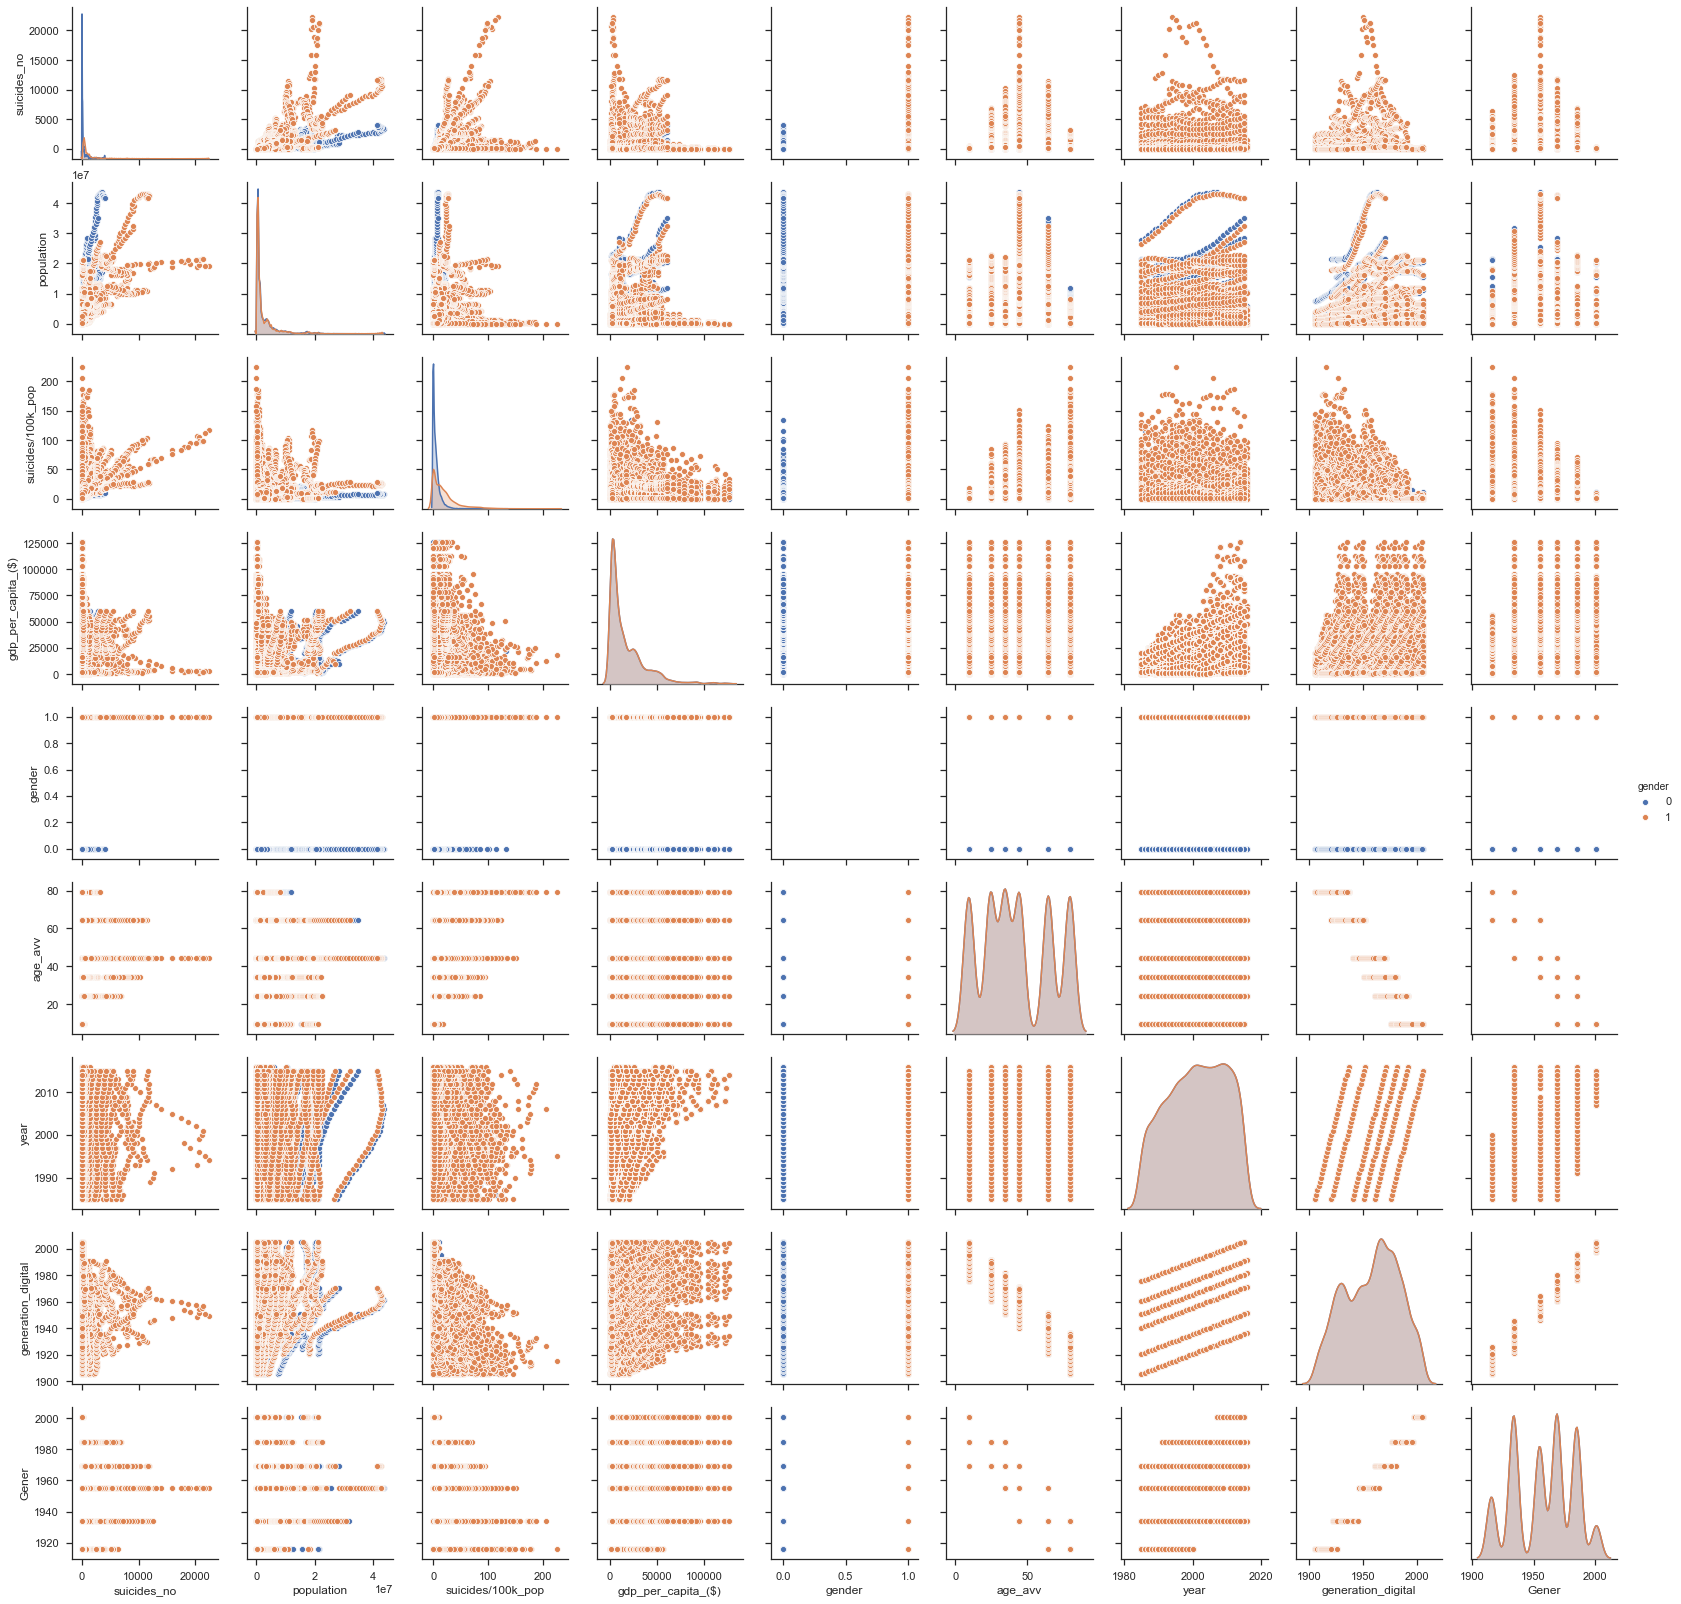

In [57]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data, hue='gender')
plt.show()

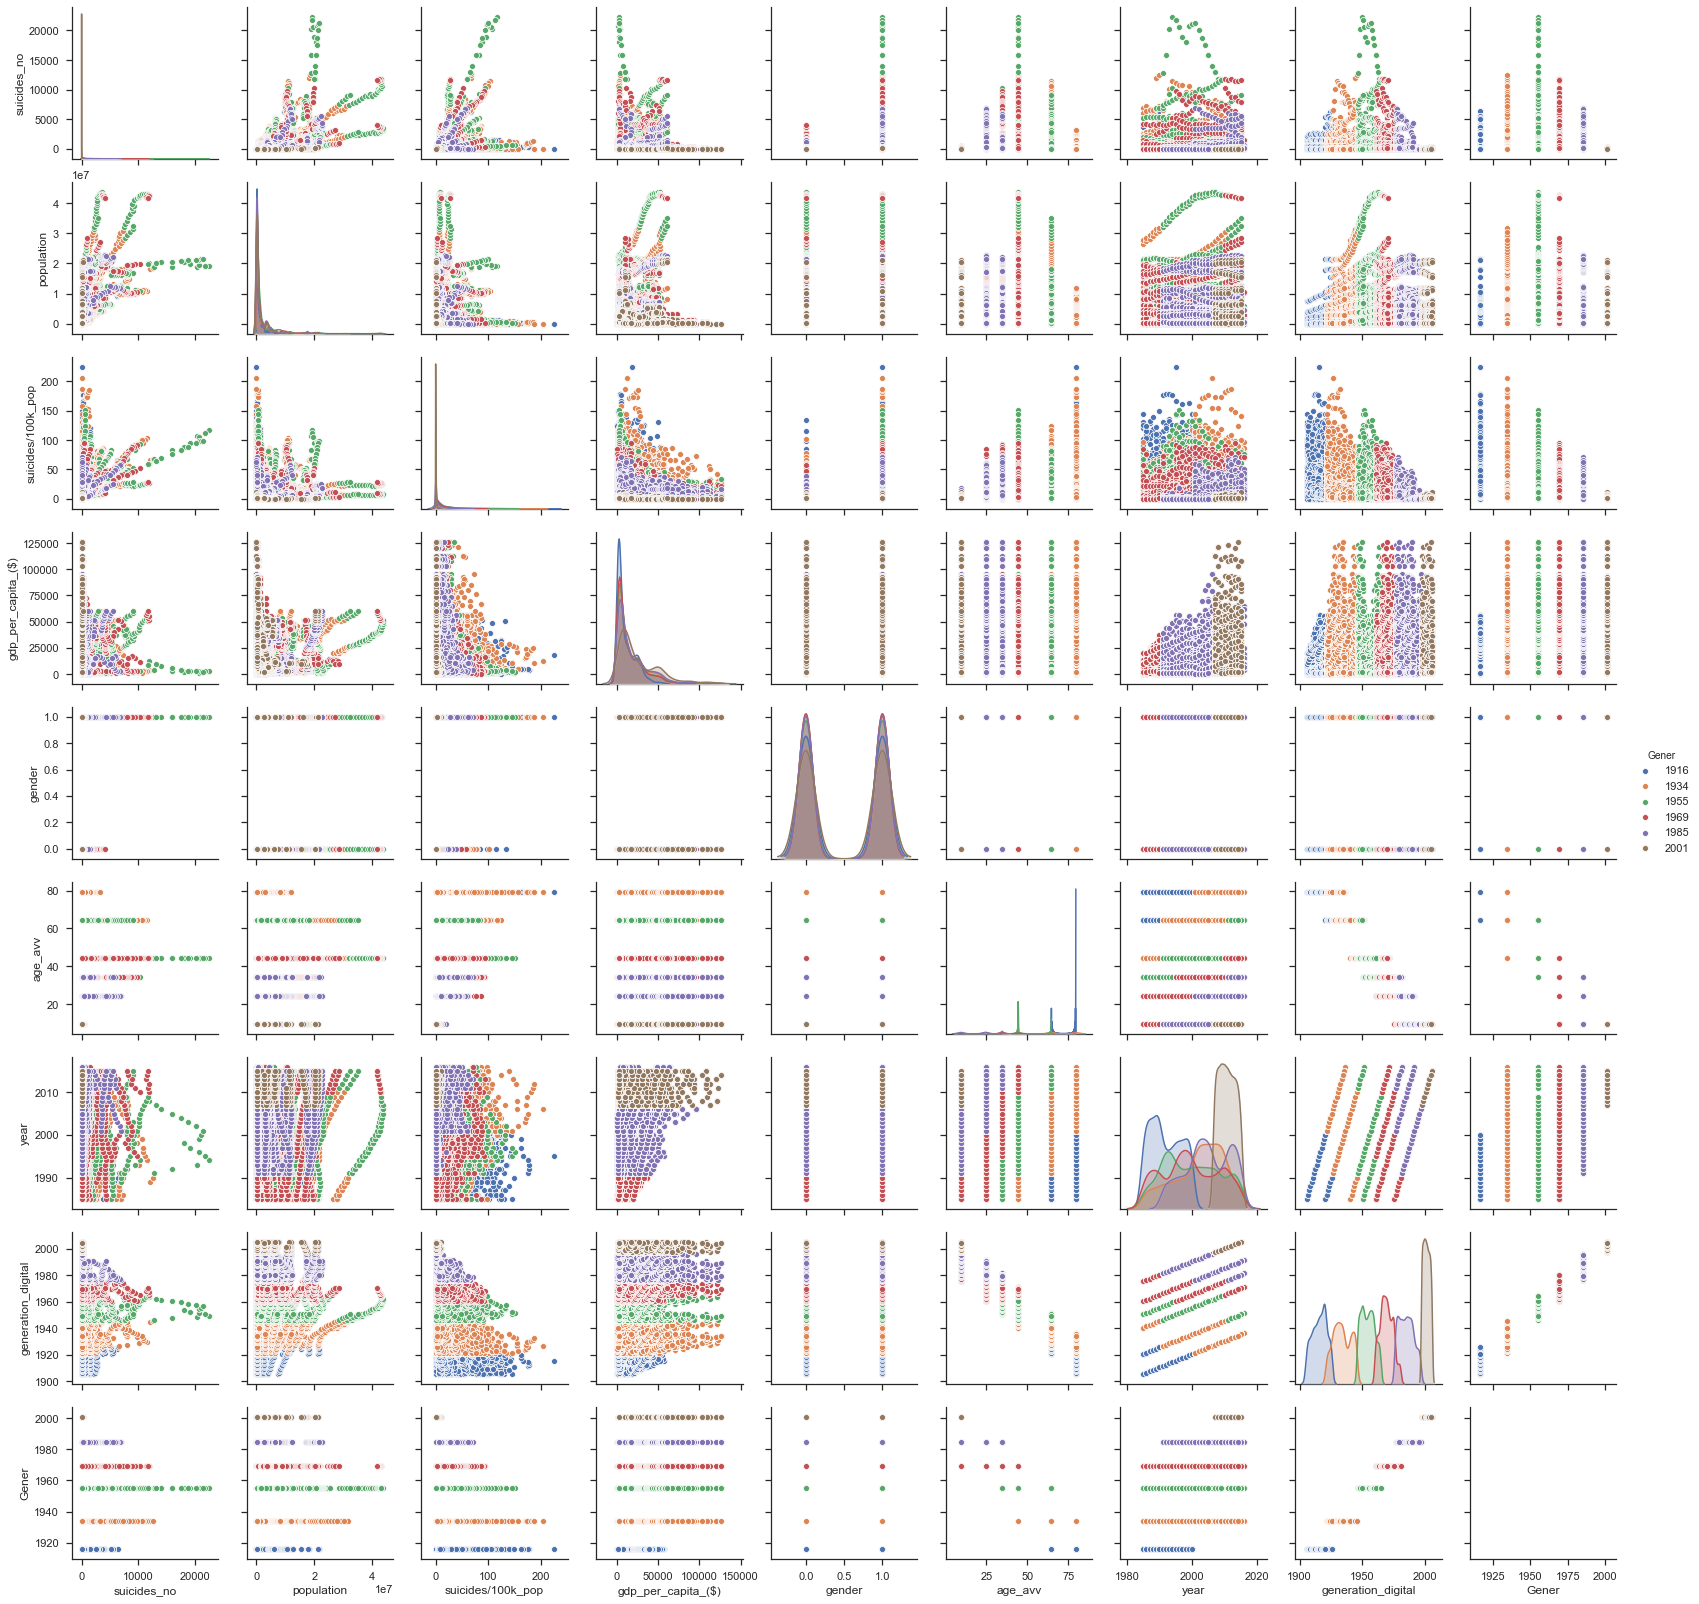

In [59]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data, hue='Gener')
plt.show()

Каких то четко наблюдаемых классов не вижу.  
**Возможно модель имеет смысл строить в разрезе страны, но это слишком сложно для лабораторки.**  
Попробуем укрупнить ситуацию и введем континенты.

In [60]:
country_by_continent = pd.read_json('country-by-continent.json')
country_by_continent

continent                               country
0             Asia                           Afghanistan
1           Europe                               Albania
2           Africa                               Algeria
3          Oceania                        American Samoa
4           Europe                               Andorra
5           Africa                                Angola
6    North America                              Anguilla
7       Antarctica                            Antarctica
8    North America                   Antigua and Barbuda
9    South America                             Argentina
10            Asia                               Armenia
11   North America                                 Aruba
12         Oceania                             Australia
13          Europe                               Austria
14            Asia                            Azerbaijan
15   North America                               Bahamas
16            Asia                               Bahrain
17            Asia                            Bangladesh
18   North America                              Barbados
19          Europe                               Belarus
20          Europe                               Belgium
21   North America                                Belize
22          Africa                                 Benin
23   North America                               Bermuda
24            Asia                                Bhutan
25   South America                               Bolivia
26          Europe                Bosnia and Herzegovina
27          Africa                              Botswana
28      Antarctica                         Bouvet Island
29   South America                                Brazil
..             ...                                   ...
213           None      The Democratic Republic of Congo
214         Africa                                  Togo
215        Oceania                               Tokelau
216        Oceania                                 Tonga
217  North America                   Trinidad and Tobago
218         Africa                               Tunisia
219           Asia                                Turkey
220           Asia                          Turkmenistan
221  North America              Turks and Caicos Islands
222        Oceania                                Tuvalu
223         Africa                                Uganda
224         Europe                               Ukraine
225           Asia                  United Arab Emirates
226         Europe                        United Kingdom
227  North America                         United States
228        Oceania  United States Minor Outlying Islands
229  South America                               Uruguay
230           Asia                            Uzbekistan
231        Oceania                               Vanuatu
232  South America                             Venezuela
233           Asia                               Vietnam
234           None               Virgin Islands, British
235           None                  Virgin Islands, U.S.
236           None                                 Wales
237        Oceania                     Wallis and Futuna
238         Africa                        Western Sahara
239           Asia                                 Yemen
240         Europe                            Yugoslavia
241         Africa                                Zambia
242         Africa                              Zimbabwe

[243 rows x 2 columns]

In [62]:
data_continent = pd.merge(left = data, right=country_by_continent, left_on='country', right_on='country')
data_continent.head(10)

suicides_no  population  suicides/100k_pop _gdp_for_year_($)_  \
0           21      312900               6.71      2,156,624,900   
1           16      308000               5.19      2,156,624,900   
2           14      289700               4.83      2,156,624,900   
3            1       21800               4.59      2,156,624,900   
4            9      274300               3.28      2,156,624,900   
5            1       35600               2.81      2,156,624,900   
6            6      278800               2.15      2,156,624,900   
7            4      257200               1.56      2,156,624,900   
8            1      137500               0.73      2,156,624,900   
9            0      311000               0.00      2,156,624,900   

   gdp_per_capita_($)  gender  age_avv  country  year  generation_digital  \
0                 796       1     24.5  Albania  1987              1962.5   
1                 796       1     44.5  Albania  1987              1942.5   
2                 796       0     24.5  Albania  1987              1962.5   
3                 796       1     79.5  Albania  1987              1907.5   
4                 796       1     34.5  Albania  1987              1952.5   
5                 796       0     79.5  Albania  1987              1907.5   
6                 796       0     44.5  Albania  1987              1942.5   
7                 796       0     34.5  Albania  1987              1952.5   
8                 796       1     64.5  Albania  1987              1922.5   
9                 796       0      9.5  Albania  1987              1977.5   

   Gener continent  
0   1969    Europe  
1   1934    Europe  
2   1969    Europe  
3   1916    Europe  
4   1955    Europe  
5   1916    Europe  
6   1934    Europe  
7   1955    Europe  
8   1916    Europe  
9   1969    Europe

In [64]:
data_continent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26524 entries, 0 to 26523
Data columns (total 12 columns):
suicides_no           26524 non-null int64
population            26524 non-null int64
suicides/100k_pop     26524 non-null float64
_gdp_for_year_($)_    26524 non-null object
gdp_per_capita_($)    26524 non-null int64
gender                26524 non-null int8
age_avv               26524 non-null float64
country               26524 non-null object
year                  26524 non-null int64
generation_digital    26524 non-null float64
Gener                 26524 non-null int64
continent             26212 non-null object
dtypes: float64(3), int64(5), int8(1), object(3)
memory usage: 2.5+ MB


In [67]:
data_continent[data_continent['continent'].isnull()] 

suicides_no  population  suicides/100k_pop _gdp_for_year_($)_  \
13592           82      102200              80.23     26,932,728,899   
13593          925     1735100              53.31     26,932,728,899   
13594          356      706400              50.40     26,932,728,899   
13595          602     1455200              41.37     26,932,728,899   
13596           85      291100              29.20     26,932,728,899   
13597          375     1425100              26.31     26,932,728,899   
13598          188     1060900              17.72     26,932,728,899   
13599          170     1338900              12.70     26,932,728,899   
13600          225     1845400              12.19     26,932,728,899   
13601          104     1453700               7.15     26,932,728,899   
13602           53     1698000               3.12     26,932,728,899   
13603            7     1661900               0.42     26,932,728,899   
13604           74      101600              72.83     24,881,135,586   
13605          866     1769600              48.94     24,881,135,586   
13606          354      741600              47.73     24,881,135,586   
13607          621     1441200              43.09     24,881,135,586   
13608           91      294600              30.89     24,881,135,586   
13609          405     1438500              28.15     24,881,135,586   
13610          166     1093000              15.19     24,881,135,586   
13611          139     1351900              10.28     24,881,135,586   
13612          185     1877800               9.85     24,881,135,586   
13613          104     1438900               7.23     24,881,135,586   
13614           66     1721900               3.83     24,881,135,586   
13615           11     1682200               0.65     24,881,135,586   
13616           64      101800              62.87     24,906,939,560   
13617          925     1794700              51.54     24,906,939,560   
13618          390      785400              49.66     24,906,939,560   
13619          676     1421100              47.57     24,906,939,560   
13620          453     1459100              31.05     24,906,939,560   
13621           84      298600              28.13     24,906,939,560   
...            ...         ...                ...                ...   
13874          182     1405609              12.95    236,634,552,078   
13875          136     1451026               9.37    236,634,552,078   
13876          193     2289754               8.43    236,634,552,078   
13877           89     1228388               7.25    236,634,552,078   
13878           42     1313549               3.20    236,634,552,078   
13879           27     1246955               2.17    236,634,552,078   
13880         1082     2116035              51.13    221,415,572,820   
13881           70      148578              47.11    221,415,572,820   
13882          667     1462224              45.62    221,415,572,820   
13883          343      911127              37.65    221,415,572,820   
13884          356     1377269              25.85    221,415,572,820   
13885           47      325593              14.44    221,415,572,820   
13886          132     1344351               9.82    221,415,572,820   
13887          126     1490998               8.45    221,415,572,820   
13888          171     2303567               7.42    221,415,572,820   
13889           69     1263876               5.46    221,415,572,820   
13890           38     1377917               2.76    221,415,572,820   
13891           18     1307309               1.38    221,415,572,820   
13892           72      156393              46.04    184,388,432,149   
13893          962     2130654              45.15    184,388,432,149   
13894          603     1492576              40.40    184,388,432,149   
13895          363      951365              38.16    184,388,432,149   
13896          312     1326082              23.53    184,388,432,149   
13897           42      343577              12.

Предстоит возня с Казахстаном, хорошо, что он один такой

In [77]:
data_continent = data_continent.fillna('Asia')
data_continent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26524 entries, 0 to 26523
Data columns (total 12 columns):
suicides_no           26524 non-null int64
population            26524 non-null int64
suicides/100k_pop     26524 non-null float64
_gdp_for_year_($)_    26524 non-null object
gdp_per_capita_($)    26524 non-null int64
gender                26524 non-null int8
age_avv               26524 non-null float64
country               26524 non-null object
year                  26524 non-null int64
generation_digital    26524 non-null float64
Gener                 26524 non-null int64
continent             26524 non-null object
dtypes: float64(3), int64(5), int8(1), object(3)
memory usage: 2.5+ MB


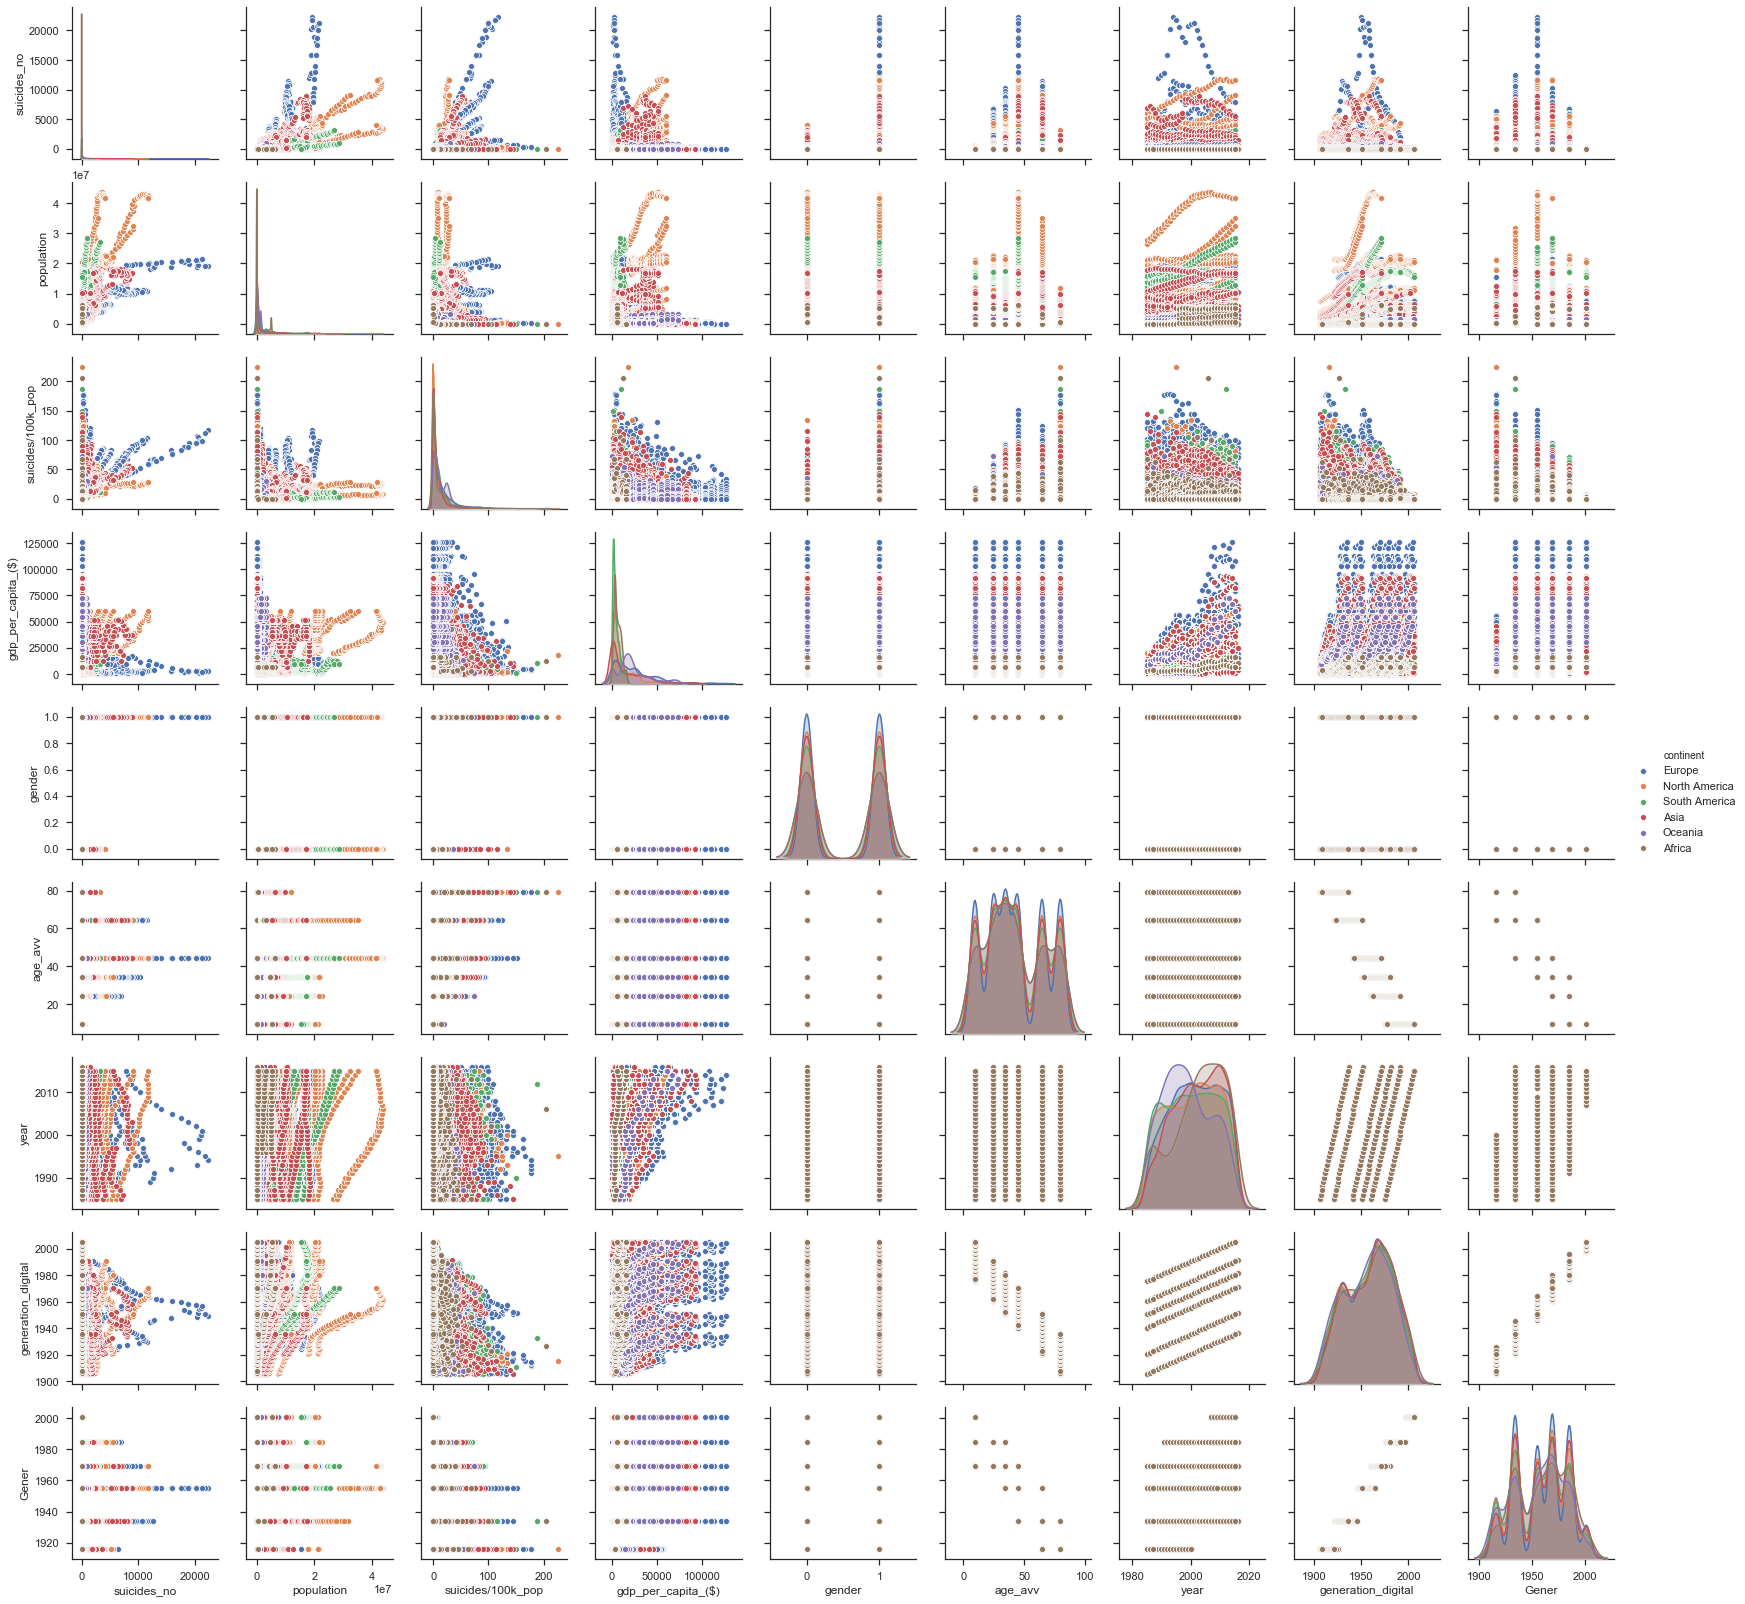

In [80]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data_continent, hue='continent')
plt.show()

По континетнтам вроде бы просматриваются классы какие-то.  
Пронумеруем их в порядке возрастания процентов суицидов. Мне кажется такой подход позволит поймать какие-нибудь зависимости.

In [83]:
data_continent.groupby('continent').mean().sort_values(by=['suicides/100k_pop'])

suicides_no    population  suicides/100k_pop  \
continent                                                     
North America   232.809135  2.213254e+06           7.443032   
Africa           13.500000  1.083455e+06           7.531945   
Asia            234.793814  1.776530e+06           9.164915   
South America   141.628644  2.537680e+06          11.428745   
Oceania         100.651190  7.692974e+05          12.576476   
Europe          305.341635  1.689057e+06          17.469312   

               gdp_per_capita_($)  gender    age_avv         year  \
continent                                                           
North America        11958.653699     0.5  42.844911  2000.496700   
Africa                6857.589499     0.5  42.912888  2002.883055   
Asia                 15960.027216     0.5  42.902062  2002.292784   
South America         5035.482890     0.5  42.833333  2000.110266   
Oceania              23414.742857     0.5  42.833333  1998.885714   
Europe               24570.460928     0.5  42.887475  2001.449919   

               generation_digital        Gener  
continent                                       
North America         1957.651789  1957.560611  
Africa                1959.970167  1959.789976  
Asia                  1959.390722  1959.322474  
South America         1957.276933  1957.158428  
Oceania               1956.052381  1956.209524  
Europe                1958.562444  1958.504602

In [87]:
data_continent['cont'] = 0
ind = 0 
total = data_continent['continent'].count()
print(total)
while ind < total:
    continent = data_continent.loc[ind, 'continent']
    if continent == 'North America':
        data_continent.loc[ind, 'cont'] = 0
    elif continent == 'Africa':
        data_continent.loc[ind, 'cont'] = 1
    elif continent == 'Asia':
        data_continent.loc[ind, 'cont'] = 2
    elif continent == 'South America':
        data_continent.loc[ind, 'cont'] = 3
    elif continent == 'Oceania':
        data_continent.loc[ind, 'cont'] = 4
    elif continent == 'Europe':
        data_continent.loc[ind, 'cont'] = 5
    ind += 1
data_continent.head()    

26524


suicides_no  population  suicides/100k_pop _gdp_for_year_($)_  \
0           21      312900               6.71      2,156,624,900   
1           16      308000               5.19      2,156,624,900   
2           14      289700               4.83      2,156,624,900   
3            1       21800               4.59      2,156,624,900   
4            9      274300               3.28      2,156,624,900   

   gdp_per_capita_($)  gender  age_avv  country  year  generation_digital  \
0                 796       1     24.5  Albania  1987              1962.5   
1                 796       1     44.5  Albania  1987              1942.5   
2                 796       0     24.5  Albania  1987              1962.5   
3                 796       1     79.5  Albania  1987              1907.5   
4                 796       1     34.5  Albania  1987              1952.5   

   Gener continent  cont  
0   1969    Europe     5  
1   1934    Europe     5  
2   1969    Europe     5  
3   1916    Europe     5  
4   1955    Europe     5

In [91]:
data_continent.drop(['suicides_no','population','country','generation_digital','continent'], axis='columns', inplace=True)

In [92]:
data_continent.head()

suicides/100k_pop _gdp_for_year_($)_  gdp_per_capita_($)  gender  age_avv  \
0               6.71      2,156,624,900                 796       1     24.5   
1               5.19      2,156,624,900                 796       1     44.5   
2               4.83      2,156,624,900                 796       0     24.5   
3               4.59      2,156,624,900                 796       1     79.5   
4               3.28      2,156,624,900                 796       1     34.5   

   year  Gener  cont  
0  1987   1969     5  
1  1987   1934     5  
2  1987   1969     5  
3  1987   1916     5  
4  1987   1955     5

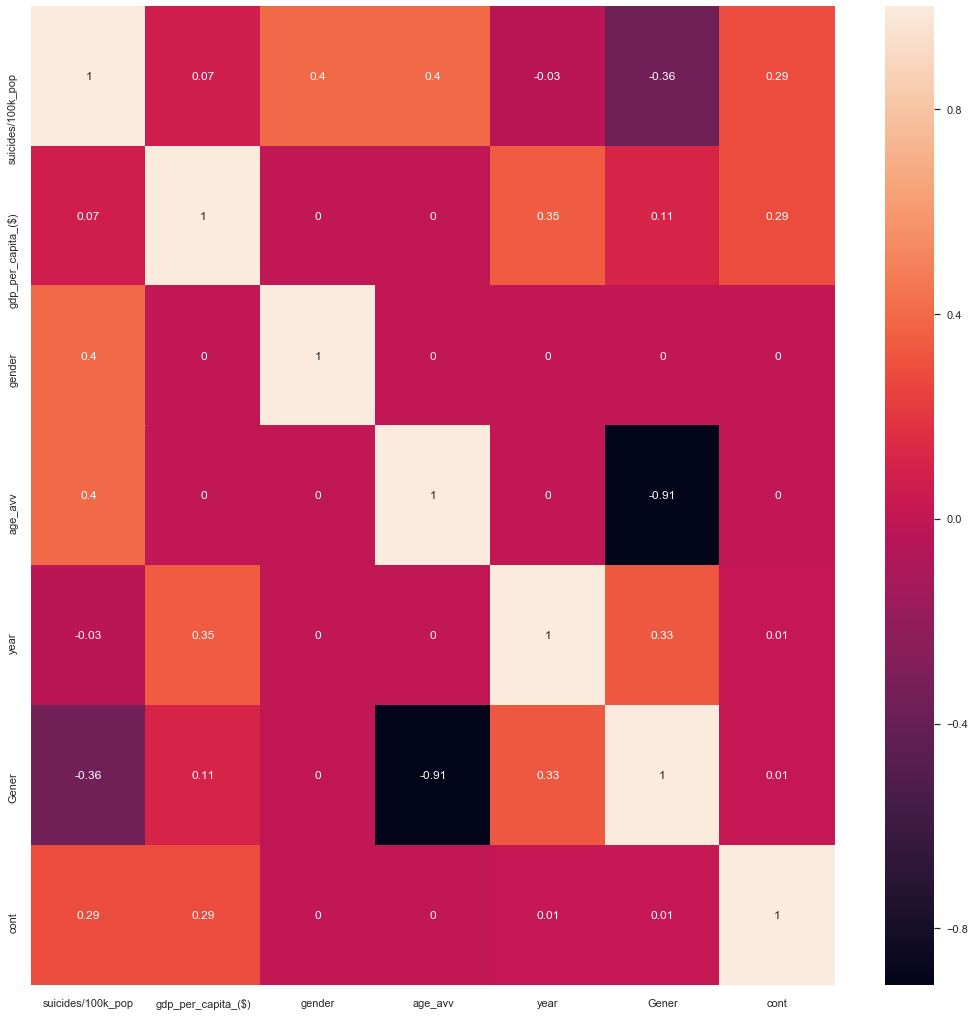

In [94]:
sns.set(rc={'figure.figsize':(18,18)})
correlation_matrix = data_continent.corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Ну что, целевая величина коррелирует только с 'cont', 'Gener', 'gender' (континенты, поколения, пол)

In [101]:
data_continent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26524 entries, 0 to 26523
Data columns (total 8 columns):
suicides/100k_pop     26524 non-null float64
_gdp_for_year_($)_    26524 non-null object
gdp_per_capita_($)    26524 non-null int64
gender                26524 non-null int8
age_avv               26524 non-null float64
year                  26524 non-null int64
Gener                 26524 non-null int64
cont                  26524 non-null int64
dtypes: float64(2), int64(4), int8(1), object(1)
memory usage: 2.9+ MB


In [102]:
X = data_continent[['cont', 'Gener', 'gender']]
y = data_continent['suicides/100k_pop']

In [98]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 30)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [111]:
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
mean_absolute_error(Y_pred,y_test)

10.027495018255422

In [117]:
model.coef_

array([ 2.16890509, -0.257756  , 14.85244237])

In [118]:
X_end = X_test
X_end['suicides_fact'] = y_test
X_end['suicides_model'] = Y_pred
X_end['error'] = round((y_test-Y_pred)/y_test*100)

In [121]:
X_end

cont  Gener  gender  suicides_fact  suicides_model   error
14142     2   1985       1           0.00       11.089072    -inf
8975      5   1969       0           4.14        6.867441   -66.0
23790     2   1969       1          18.73       15.213168    19.0
5844      3   1955       1           9.05       20.990657  -132.0
4782      5   1985       1           1.29       17.595787 -1264.0
13239     2   1969       1          14.14       15.213168    -8.0
3125      0   2001       1           0.00        2.627165    -inf
2303      2   1934       1           7.20       24.234628  -237.0
16253     1   1934       0           0.00        7.213280    -inf
19263     5   1916       0           7.22       20.528509  -184.0
14745     5   1955       1          67.83       25.328467    63.0
20155     5   1985       0           1.71        2.743345   -60.0
13457     2   1985       0           8.39       -3.763371   145.0
24409     2   1985       0           1.03       -3.763371   465.0
16980     5   1985       1           0.50       17.595787 -3419.0
9349      2   1985       1           0.00       11.089072    -inf
23643     5   1985       0           2.17        2.743345   -26.0
24489     2   1934       0           8.77        9.382186    -7.0
8068      0   1969       1          19.09       10.875358    43.0
346       0   1934       1           0.00       19.896818    -inf
11642     5   1955       1          18.60       25.328467   -36.0
4224      3   1969       1           5.02       17.382073  -246.0
7026      2   1985       1          12.75       11.089072    13.0
716       3   1969       0           3.31        2.529630    24.0
25094     5   2001       1           1.01       13.471691 -1234.0
8224      0   1934       1          16.99       19.896818   -17.0
13973     4   1955       1           0.00       23.159562    -inf
4390      3   1955       1          10.83       20.990657   -94.0
19447     0   1955       0           2.50       -0.368501   115.0
5495      3   1969       1          22.47       17.382073    23.0
...     ...    ...     ...            ...             ...     ...
20411     5   1969       1          80.83       21.719883    73.0
190       5   1985       0           1.05        2.743345  -161.0
11007     3   1934       1          26.94       26.403533     2.0
25490     5   2001       0           0.09       -1.380751  1634.0
10708     0   1934       1           3.91       19.896818  -409.0
23214     5   1985       1           0.34       17.595787 -5075.0
2419      0   1916       1           0.00       24.536426    -inf
13893     2   1969       1          45.15       15.213168    66.0
8141      0   1969       0          16.36       -3.977085   124.0
19177     5   1934       1          25.67       30.741343   -20.0
19487     0   1985       0           0.00       -8.101181     inf
818       3   1985       1          19.59       13.257977    32.0
22662     5   2001       1           0.31       13.471691 -4246.0
9481      2   2001       1           0.00        6.964976    -inf
20291     5   1955       1          53.78       25.328467    53.0
16530     0   1969       1           9.15       10.875358   -19.0
17213     4   1916       0          11.17       18.359604   -64.0
4943      0   1969       1          26.89       10.875358    60.0
15414     5   1934       1          73.54       30.741343    58.0
11866     5   1934       1          59.75       30.741343    49.0
19444     0   1969       1           9.04       10.875358   -20.0
5930      3   1969       0           2.03        2.529630   -25.0
4398      3   1985       1           0.34       13.257977 -3799.0
11056     3   1934       1          28.41       26.403533     7.0
10282     0   1916       0           0.00        9.683983    -inf
11486     5   1969       1          43.48       21.719883    50.0
11627     5   1934       1          22.10       30.741343   -39.0
14796     5   1934       0          23.24       15.888901    32.0
17439     4   1985       1          22.58      

Результат отвратительный. В профайле было отмечено, что есть нулевые данные по суициду. Предположим, что это ошибка. Удалим их и посмотрим, что получилось.

In [123]:
data_continent = data_continent[data_continent['suicides/100k_pop'] != 0]

In [124]:
data_continent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22612 entries, 0 to 26523
Data columns (total 8 columns):
suicides/100k_pop     22612 non-null float64
_gdp_for_year_($)_    22612 non-null object
gdp_per_capita_($)    22612 non-null int64
gender                22612 non-null int8
age_avv               22612 non-null float64
year                  22612 non-null int64
Gener                 22612 non-null int64
cont                  22612 non-null int64
dtypes: float64(2), int64(4), int8(1), object(1)
memory usage: 1.4+ MB


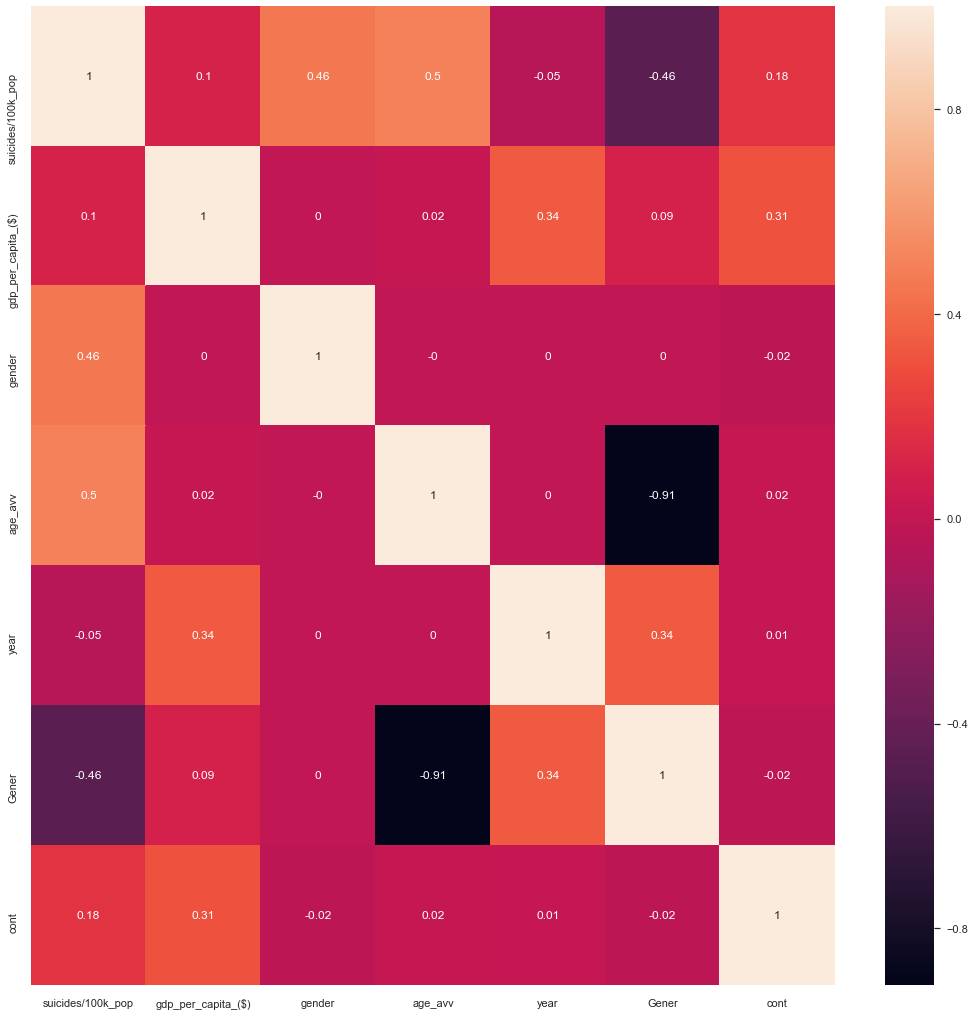

In [125]:
sns.set(rc={'figure.figsize':(18,18)})
correlation_matrix = data_continent.corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [126]:
X = data_continent[['cont', 'Gener', 'gender']]
y = data_continent['suicides/100k_pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 30)
model = LinearRegression()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
mean_absolute_error(Y_pred,y_test)

10.201364172171454

In [127]:
model.coef_

array([ 1.80356047, -0.30041437, 16.14196447])

In [128]:
X_end = X_test
X_end['suicides_fact'] = y_test
X_end['suicides_model'] = Y_pred
X_end['error'] = round((y_test-Y_pred)/y_test*100)
X_end

cont  Gener  gender  suicides_fact  suicides_model   error
25402     5   1934       0           3.69       16.699590  -353.0
5751      3   1955       0           1.63        6.783767  -316.0
24308     0   1934       1          14.33       23.823752   -66.0
25621     0   1969       0           3.92       -2.832716   172.0
20610     5   2001       1           1.01       12.713791 -1159.0
14195     2   1955       0           1.44        4.980207  -246.0
19014     5   1969       0           5.76        6.185087    -7.0
13825     2   1934       0          15.12       11.288909    25.0
13873     2   1934       0          15.63       11.288909    28.0
7009      2   1934       0           1.26       11.288909  -796.0
17733     5   1969       0           4.70        6.185087   -32.0
25277     5   1955       1          16.42       26.532853   -62.0
968       2   1955       0           1.25        4.980207  -298.0
23610     5   1934       1          47.50       32.841554    31.0
16346     1   1969       0           2.16       -1.029155   148.0
2637      2   1934       1           6.04       27.430873  -354.0
12399     2   1969       0           4.16        0.774405    81.0
10194     5   1985       1           3.34       17.520421  -425.0
20441     5   1985       0           9.45        1.378457    85.0
22665     5   1934       1          15.06       32.841554  -118.0
7483      5   1969       1          12.56       22.327051   -78.0
24206     0   1985       0           1.73       -7.639346   542.0
22748     3   1916       1          69.76       34.641892    50.0
17917     5   1969       1          21.17       22.327051    -5.0
10239     5   1955       1          12.00       26.532853  -121.0
20110     5   1955       1          40.52       26.532853    35.0
14346     2   1969       1           3.13       16.916370  -440.0
25929     3   1969       1           6.48       18.719930  -189.0
760       3   1969       1          10.42       18.719930   -80.0
13569     2   1955       1          33.78       21.122171    37.0
...     ...    ...     ...            ...             ...     ...
1064      2   1969       0           0.35        0.774405  -121.0
20186     5   1985       1          10.92       17.520421   -60.0
236       5   1985       1           3.84       17.520421  -356.0
14160     2   1969       0           1.35        0.774405    43.0
23594     5   1969       0           6.94        6.185087    11.0
3421      5   1934       0          13.99       16.699590   -19.0
8656      5   1916       1          64.29       38.249013    41.0
4697      5   1969       0           4.85        6.185087   -28.0
16028     1   1934       1          20.11       25.627313   -27.0
24697     2   1934       0           0.48       11.288909 -2252.0
6720      0   1969       1          13.84       13.309249     4.0
21420     2   1969       1          12.54       16.916370   -35.0
23104     5   1934       0          11.92       16.699590   -40.0
16003     5   1969       1          22.77       22.327051     2.0
4621      5   1955       1          18.25       26.532853   -45.0
3261      5   1934       1         106.18       32.841554    69.0
4436      3   1934       1          18.44       29.234433   -59.0
16800     5   1969       1           0.50       22.327051 -4365.0
2064      5   1955       1          26.24       26.532853    -1.0
24565     2   1969       0           2.94        0.774405    74.0
19962     5   1955       0           4.22       10.390888  -146.0
3440      5   1916       1         101.52       38.249013    62.0
12599     2   1985       1          10.02       12.109740   -21.0
19579     0   1969       0           1.81       -2.832716   257.0
26249     3   1955       1          47.86       22.925732    52.0
22245     1   1969       1           3.50       15.112809  -332.0
26186     3   2001       1           1.13        9.106670  -706.0
5971      3   1934       0           0.75       13.092469 -1646.0
3983      0   1985       0           7.58      

In [133]:
round(X_end['error'].mean())

-329

In [130]:
X_end[X_end.suicides_model < 0] = 0

In [132]:
round(X_end['error'].mean())

-329

Получилось еще хуже. Предсказательная сила модели отсутствует. 

# Вывод

**Полагаю, что для данного датасета имеет смысл рассматривать отдельно поколения, и хотя бы континеты. В каждом случае будет своя модель как мне кажется**